In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Create Gaussian Kernel
def gaus_kernel(X, sigma):
	row, col = X.shape

	K = np.zeros([row, row])

	for i in range(0, row):
		for j in range(0, row):
			v_i = X[i]
			v_j = X[j]
			K[i,j] = np.exp((-(np.linalg.norm(v_i.T - v_j.T)**2))/(2*sigma**2))

	return K

In [3]:

# Convert the kernel into a Gram matrix
def gram_matrix(gaus):
	row, col = gaus.shape

	return gaus - ((np.ones((row, row)) / row) @ gaus) - (gaus @ (np.ones((row, row)) / row)) + ((np.ones((row, row)) / row) @ gaus @ np.identity(row))

In [4]:
# Perform kernel PCA
def kernel_pca(n_components, kernel):
	eig_vals, eig_vectors = np.linalg.eigh(kernel)
	eig_vals, eig_vectors = eig_vals[::-1], eig_vectors[:, ::-1]
	return np.column_stack([eig_vectors[:, i] for i in range(n_components)])  


In [5]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)
sigma = 0.15

X_kpca = kernel_pca(2, gram_matrix(gaus_kernel(X, sigma)))

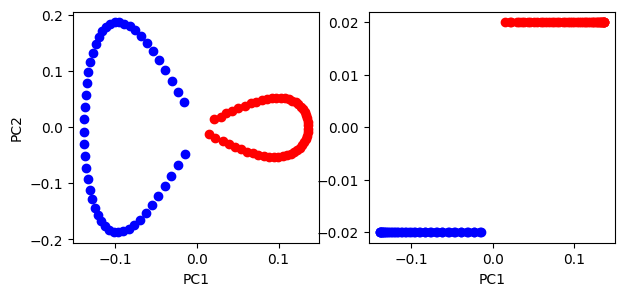

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red')
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue')
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,  color='red')
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02, color='blue')

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()